# Sphere $\mathbb{S}^2$

This notebook demonstrates some differential geometry capabilities of SageMath on the example of the 2-dimensional sphere. The corresponding tools have been developed within
the [SageManifolds](https://sagemanifolds.obspm.fr) project.

*NB:* a version of SageMath at least equal to 9.3 is required to run this notebook:

In [1]:
version()

'SageMath version 10.3, Release Date: 2024-03-19'

First we set up the notebook to display math formulas using LaTeX formatting:

In [2]:
%display latex

## $\mathbb{S}^2$ from the manifold catalog

The 2-sphere, with predefined charts and embedding in the Euclidean 3-space, can be obtained directly from SageMath's manifold catalog:

In [3]:
S2 = manifolds.Sphere(2)
S2

2-sphere S^2 of radius 1 smoothly embedded in the Euclidean space E^3

In [4]:
print(S2)

2-sphere S^2 of radius 1 smoothly embedded in the Euclidean space E^3


In [5]:
S2.spherical_coordinates()

Chart (A, (theta, phi))

In [6]:
S2.metric().display()

g = dtheta⊗dtheta + sin(theta)^2 dphi⊗dphi

## $\mathbb{S}^2$ defined from scratch as a 2-dimensional smooth manifold

For the purpose of introducing generic smooth manifolds in SageMath, we shall not use the above predefined object. Instead we shall construct $\mathbb{S}^2$ from scratch, by invoking the generic function `Manifold`:

In [7]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2', start_index=1)

The first argument, `2`, is the dimension of the manifold, while the second argument is the symbol used to label the manifold.

The argument `start_index` sets the index range to be used on the manifold for labelling components w.r.t. a basis or a frame: `start_index=1` corresponds to $\{1,2\}$; the default value is `start_index=0` and yields $\{0,1\}$.

The function `Manifold` has actually many options, which are displayed via the command `Manifold?`:

In [8]:
# Manifold?

By default `Manifold` constructs a smooth manifold over $\mathbb{R}$:

In [9]:
print(S2)

2-dimensional differentiable manifold S^2


In [10]:
S2

2-dimensional differentiable manifold S^2

$\mathbb{S}^2$ is in the category of smooth manifolds over $\mathbb{R}$:

In [11]:
S2.category()

Category of smooth manifolds over Real Field with 53 bits of precision

In [12]:
print(S2.category())

Category of smooth manifolds over Real Field with 53 bits of precision


At the moment, the real field $\mathbb{R}$ is modeled by 53-bit floating-point approximations, but this plays no role in the manifold implementation:

In [13]:
print(S2.base_field())

Real Field with 53 bits of precision


In [14]:
S2.base_field() is RR

True

### Coordinate charts on $\mathbb{S}^2$

The function `Manifold` generates a manifold with no-predefined coordinate chart, so that the manifold (user) **atlas** is empty:

In [15]:
S2.atlas()

[]

Let us introduce some charts. At least two charts are necessary to cover the sphere. Let us choose the charts associated with the **stereographic projections** to the equatorial plane from the North pole and the South pole respectively. We first introduce the open subsets covered by these two charts: 
$$ U := \mathbb{S}^2\setminus\{N\}, $$  
$$ V := \mathbb{S}^2\setminus\{S\}, $$
where $N$ is a point of $\mathbb{S}^2$, which we shall call the **North pole**, and $S$ is the point of $U$ of stereographic coordinates $(0,0)$, which we call the **South pole**:

To find the method to create an open subset, we type `U = S2.<TAB>` to get the list of possible methods by autocompletion:

In [16]:
#U = S2.

In [17]:
U = S2.open_subset('U')
print(U)

Open subset U of the 2-dimensional differentiable manifold S^2


In [18]:
V = S2.open_subset('V')
print(V)

Open subset V of the 2-dimensional differentiable manifold S^2


As an open subset of a smooth manifold, $U$ is itself a smooth manifold:

In [19]:
print(U.category())

Join of Category of subobjects of sets and Category of smooth manifolds over Real Field with 53 bits of precision


<p>We declare that $\mathbb{S}^2 = U \cup V$:</p>

In [20]:
S2.declare_union(U, V)

The **stereographic chart** on $U$ is constructed from the stereographic projection from the North pole onto the equatorial plane: in the [Wikipedia figure](https://en.wikipedia.org/wiki/Stereographic_projection) below, the stereographic coordinates $(x,y)$ of the point $P\in U$ are the Cartesian coordinates of the point $P'$ in the equatorial plane.

![stereographic projection](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Stereoprojzero.svg/241px-Stereoprojzero.svg.png)

We call this chart `stereoN` and construct it via the method `chart`:

In [21]:
stereoN.<x,y> = U.chart()

The syntax `.<x,y>` in the left-hand side implies that the Python names `x` and `y` are added to the global namespace, to access to the two coordinates of the chart as symbolic variables. This allows one to refer subsequently to the coordinates by these names. Besides, in the present case, the function `chart()` has no argument, which implies that the coordinate symbols will be `x` and `y` (i.e. exactly the characters appearing in the `<...>` operator) and that each coordinate range is $(-\infty,+\infty)$. As we will see below, for other cases, an argument must be passed to `chart()`  to specify each coordinate symbol and range, as well as some specific LaTeX symbol.

*Note:* the notation `.<x,y>` is not standard Python syntax, but a "SageMath enhanced" syntax. 
Actually the SageMath kernel preparses the cell entries before sending them to the Python interpreter. The outcome of the preparser is shown by the function `preparse`. In the present case:

In [22]:
print(preparse("stereoN.<x,y> = U.chart()"))

stereoN = U.chart(names=('x', 'y',)); (x, y,) = stereoN._first_ngens(2)


Another example of preparsing:

In [23]:
preparse("2^3")

'Integer(2)**Integer(3)'

The chart created by the above command:

In [24]:
stereoN

Chart (U, (x, y))

In [25]:
print(stereoN)

Chart (U, (x, y))


In [26]:
stereoN.coord_range()

x: (-oo, +oo); y: (-oo, +oo)

The coordinates can be accessed individually, either by means of their indices in the chart ( following the convention `start_index=1` set in the manifold's definition) or by their names as Python variables:

In [27]:
stereoN[1]

x

In [28]:
y is stereoN[2]

True

The coordinates are SageMath symbolic expressions:

In [29]:
type(y)

<class 'sage.symbolic.expression.Expression'>

In [30]:
y.parent()

Symbolic Ring

#### Stereographic coordinates from the South Pole

We introduce on $V$ the coordinates $(x',y')$ corresponding to the stereographic projection from the South pole:

In [31]:
stereoS.<xp,yp> = V.chart("xp:x' yp:y'")

In this case, the string argument passed to `chart` stipulates that the text-only names of the coordinates are xp and yp (same as the Python variables names defined within the `<...>` operator in the left-hand side), while their LaTeX names are $x'$ and $y'$.

In [32]:
stereoS

Chart (V, (xp, yp))

At this stage, the user's atlas on the manifold is made of two charts:

In [33]:
S2.atlas()

[Chart (U, (x, y)), Chart (V, (xp, yp))]

To complete the construction of the manifold structure, we have 
to specify the <strong>transition map</strong> between the charts `stereoN` = $(U,(x,y))$ and `stereoS` = $(V,(x',y'))$; it is given by standard inversion formulas:

In [34]:
stereoN_to_S = stereoN.transition_map(stereoS, 
                                      (x/(x^2+y^2), y/(x^2+y^2)), 
                                      intersection_name='W',
                                      restrictions1= x^2+y^2!=0, 
                                      restrictions2= xp^2+yp^2!=0)
stereoN_to_S.display()

xp = x/(x^2 + y^2)
yp = y/(x^2 + y^2)

In the above declaration, 'W' is the name given to the chart-overlap subset: $W := U\cap V$, the condition $x^2+y^2 \not=0$  defines $W$ as a subset of $U$, and the condition $x'^2+y'^2\not=0$ defines $W$ as a subset of $V$.

The inverse coordinate transformation is computed by means of the method `inverse()`:

In [35]:
stereoS_to_N = stereoN_to_S.inverse()
stereoS_to_N.display()

x = xp/(xp^2 + yp^2)
y = yp/(xp^2 + yp^2)

<p>In the present case, the situation is of course perfectly symmetric regarding the coordinates $(x,y)$ and $(x',y')$.</p>
<p>At this stage, the user's atlas has four charts:</p>

In [36]:
S2.atlas()

[Chart (U, (x, y)),
 Chart (V, (xp, yp)),
 Chart (W, (x, y)),
 Chart (W, (xp, yp))]

<p>Let us store $W = U\cap V$ into a Python variable for future use:</p>

In [37]:
W = U.intersection(V)

<p>Similarly we store the charts $(W,(x,y))$ (the restriction of  $(U,(x,y))$ to $W$) and $(W,(x',y'))$ (the restriction of $(V,(x',y'))$ to $W$) into Python variables:</p>

In [38]:
stereoN_W = stereoN.restrict(W)
stereoN_W

Chart (W, (x, y))

In [39]:
stereoN_W is S2.atlas()[2]

True

In [40]:
stereoS_W = stereoS.restrict(W)
stereoS_W

Chart (W, (xp, yp))

Coordinate charts are endoved with a method `plot`. For instance, 
we may plot the chart $(W, (x',y'))$ in terms of itself, as a grid:

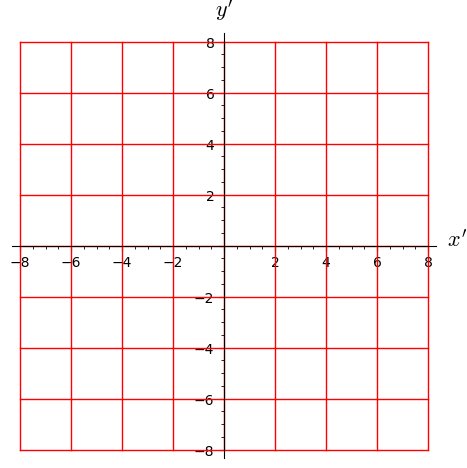

In [41]:
stereoS_W.plot()

More interestingly, let us plot the stereographic chart $(x',y')$ in terms of the stereographic chart $(x,y)$ on the domain $W$ where both systems overlap. We split the plot in four parts to avoid the singularity at $(x',y')=(0,0)$ and
ask for the coordinate lines along which $x'$ (resp. $y'$) varies to be colored in purple (resp. cyan):

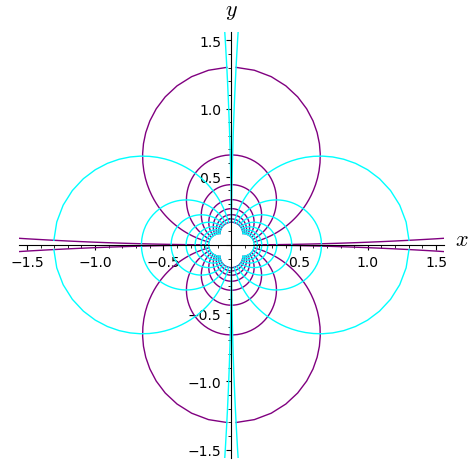

In [42]:
graph = (stereoS_W.plot(stereoN, ranges={xp:[-6,-0.02], yp:[-6,-0.02]},
                          color={xp: 'purple', yp: 'cyan'}) 
         + stereoS_W.plot(stereoN, ranges={xp:[-6,-0.02], yp:[0.02,6]},
                          color={xp: 'purple', yp: 'cyan'})
         + stereoS_W.plot(stereoN, ranges={xp:[0.02,6], yp:[-6,-0.02]},
                          color={xp: 'purple', yp: 'cyan'})
         + stereoS_W.plot(stereoN, ranges={xp:[0.02,6], yp:[0.02,6]},
                          color={xp: 'purple', yp: 'cyan'}))
graph.show(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5)

### Spherical coordinates

The standard **spherical coordinates** $(\theta,\phi)$ are defined on the open domain $A\subset W \subset \mathbb{S}^2$ that is the complement of the "origin meridian"; since the latter is the half-circle defined by $y=0$ and $x\geq 0$, we declare:

In [43]:
A = W.open_subset('A', coord_def={stereoN_W: (y!=0, x<0), 
                                  stereoS_W: (yp!=0, xp<0)})
print(A)

Open subset A of the 2-dimensional differentiable manifold S^2


<p>The restriction of the stereographic chart from the North pole to $A$ is</p>

In [44]:
stereoN_A = stereoN_W.restrict(A)
stereoN_A

Chart (A, (x, y))

<p>We then declare the chart $(A,(\theta,\phi))$ by specifying the intervals $(0,\pi)$ and $(0,2\pi)$ spanned by respectively $\theta$ and $\phi$:</p>

In [45]:
spher.<th,ph> = A.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')
spher

Chart (A, (th, ph))

In [46]:
spher.coord_range()

th: (0, pi); ph: (0, 2*pi)

<p>The specification of the spherical coordinates is completed by providing the transition map with the stereographic chart $(A,(x,y))$:</p>

In [47]:
spher_to_stereoN = spher.transition_map(stereoN_A, 
                                        (sin(th)*cos(ph)/(1-cos(th)),
                                         sin(th)*sin(ph)/(1-cos(th))))
spher_to_stereoN.display()

x = -cos(ph)*sin(th)/(cos(th) - 1)
y = -sin(ph)*sin(th)/(cos(th) - 1)

We also provide the inverse transition map:

In [48]:
spher_to_stereoN.set_inverse(2*atan(1/sqrt(x^2+y^2)), atan2(-y,-x)+pi)

Check of the inverse coordinate transformation:
  th == 2*arctan(sqrt(-cos(th) + 1)/sqrt(cos(th) + 1))  **failed**
  ph == pi + arctan2(sin(ph)*sin(th)/(cos(th) - 1), cos(ph)*sin(th)/(cos(th) - 1))  **failed**
  x == x  *passed*
  y == y  *passed*
NB: a failed report can reflect a mere lack of simplification.


The check is passed, modulo some lack of trigonometric simplifications in the first two lines.

In [49]:
spher_to_stereoN.inverse().display()

th = 2*arctan(1/sqrt(x^2 + y^2))
ph = pi + arctan2(-y, -x)

The transition map $(A,(\theta,\phi))\rightarrow (A,(x',y'))$ is obtained by combining the transition maps $(A,(\theta,\phi))\rightarrow (A,(x,y))$ and $(A,(x,y))\rightarrow (A,(x',y'))$ via the operator `*`:

In [50]:
stereoN_to_S_A = stereoN_to_S.restrict(A)
spher_to_stereoS = stereoN_to_S_A * spher_to_stereoN
spher_to_stereoS.display()

xp = -(cos(ph)*cos(th) - cos(ph))/sin(th)
yp = -(cos(th)*sin(ph) - sin(ph))/sin(th)

Similarly, the transition map $(A,(x',y'))\rightarrow (A,(\theta,\phi))$ is obtained by combining the transition maps $(A,(x',y'))\rightarrow (A,(x,y))$ and $(A,(x,y))\rightarrow (A,(\theta,\phi))$:

In [51]:
stereoS_to_N_A = stereoN_to_S.inverse().restrict(A)
stereoS_to_spher = spher_to_stereoN.inverse() * stereoS_to_N_A 
stereoS_to_spher.display()

th = 2*arctan(sqrt(xp^2 + yp^2))
ph = pi - arctan2(yp/(xp^2 + yp^2), -xp/(xp^2 + yp^2))

<p>The user atlas of $\mathbb{S}^2$ is now</p>

In [52]:
S2.atlas()

[Chart (U, (x, y)),
 Chart (V, (xp, yp)),
 Chart (W, (x, y)),
 Chart (W, (xp, yp)),
 Chart (A, (x, y)),
 Chart (A, (xp, yp)),
 Chart (A, (th, ph))]

<p>Let us draw the grid of spherical coordinates $(\theta,\phi)$ in terms of stereographic coordinates from the North pole $(x,y)$:</p>

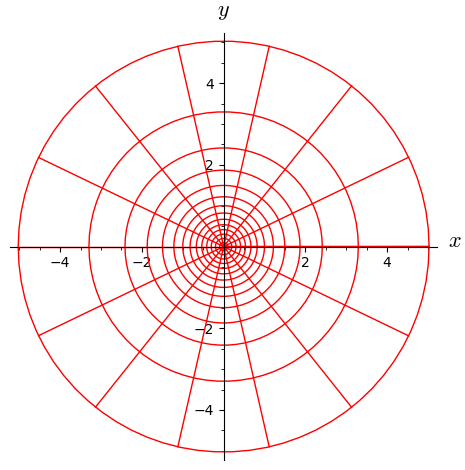

In [53]:
spher.plot(stereoN, number_values=15, ranges={th: (pi/8,pi)})

## Points on $\mathbb{S}^2$

To create a point on $\mathbb{S}^2$, we use SageMath's ***parent / element*** syntax, i.e. the call operator `S2(...)` acting on the parent `S2`, with the point's coordinates in some chart as argument. 

For instance, we declare the **North pole** (resp. the **South pole**) as the point of coordinates $(0,0)$ in the chart $(V,(x',y'))$ (resp. in the chart $(U,(x,y))$):

In [54]:
N = S2((0,0), chart=stereoS, name='N')
print(N)

Point N on the 2-dimensional differentiable manifold S^2


In [55]:
S = S2((0,0), chart=stereoN, name='S')
print(S)

Point S on the 2-dimensional differentiable manifold S^2


In [56]:
N.parent()

2-dimensional differentiable manifold S^2

In [57]:
S.parent()

2-dimensional differentiable manifold S^2

<p>We have of course</p>

In [58]:
N in S2

True

In [59]:
N in U

False

In [60]:
N in V

True

In [61]:
N in A

False

Let us introduce some point $p$ of stereographic coordinates $(x,y) = (1,2)$:

In [62]:
p = S2((1,2), chart=stereoN, name='p')

$p$ lies in the open subset $A$:

In [63]:
p in A

True

#### Charts acting on points

By definition, a chart maps points to pairs of real numbers (the point's coordinates): 

In [64]:
stereoN(p)  # by definition of p

(1, 2)

In [65]:
stereoS(p)

(1/5, 2/5)

In [66]:
spher(p)

(2*arctan(1/5*sqrt(5)), arctan(2))

In [67]:
stereoS(N)

(0, 0)

In [68]:
#stereoN(N)   ## returns an error

## Maps between manifolds: the embedding of $\mathbb{S}^2$ into $\mathbb{R}^3$

Let us first declare $\mathbb{R}^3$ as the 3-dimensional Euclidean space, denoting the Cartesian coordinates by
$(X,Y,Z)$:

In [69]:
R3.<X,Y,Z> = EuclideanSpace(name='R^3', latex_name=r'\mathbb{R}^3', metric_name='h')
cartesian = R3.cartesian_coordinates()
cartesian

Chart (R^3, (X, Y, Z))

As an Euclidean space, `R3` is considered by Sage as a smooth manifold:

In [70]:
print(R3.category())

Join of Category of smooth manifolds over Real Field with 53 bits of precision and Category of connected manifolds over Real Field with 53 bits of precision and Category of complete metric spaces


The embedding $\Phi: \mathbb{S}^2 \longmapsto \mathbb{R}^3$ is then defined via the method `diff_map` by providing the standard formulas relating the stereographic coordinates to the ambient Cartesian ones when considering the **stereographic projection** from the point $(0,0,1)$ (North pole) or $(0, 0, -1)$ (South pole) to the equatorial plane $Z=0$:

In [71]:
Phi = S2.diff_map(R3, {(stereoN, cartesian): 
                       [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                        (x^2+y^2-1)/(1+x^2+y^2)],
                       (stereoS, cartesian): 
                       [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                        (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')

In [72]:
Phi.display()

Phi: S^2 → R^3
on U: (x, y) ↦ (X, Y, Z) = (2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))
on V: (xp, yp) ↦ (X, Y, Z) = (2*xp/(xp^2 + yp^2 + 1), 2*yp/(xp^2 + yp^2 + 1), -(xp^2 + yp^2 - 1)/(xp^2 + yp^2 + 1))

In [73]:
Phi.parent()

Set of Morphisms from 2-dimensional differentiable manifold S^2 to Euclidean space R^3 in Category of smooth manifolds over Real Field with 53 bits of precision

In [74]:
print(Phi.parent())

Set of Morphisms from 2-dimensional differentiable manifold S^2 to Euclidean space R^3 in Category of smooth manifolds over Real Field with 53 bits of precision


In [75]:
Phi.parent() is Hom(S2, R3)

True

<p>$\Phi$ maps points of $\mathbb{S}^2$ to points of $\mathbb{R}^3$:</p>

In [76]:
N1 = Phi(N)
print(N1)
N1

Point Phi(N) on the Euclidean space R^3


Point Phi(N) on the Euclidean space R^3

In [77]:
cartesian(N1)

(0, 0, 1)

In [78]:
S1 = Phi(S)
print(S1)
S1

Point Phi(S) on the Euclidean space R^3


Point Phi(S) on the Euclidean space R^3

In [79]:
cartesian(S1)

(0, 0, -1)

In [80]:
p1 = Phi(p)
print(p1)
p1

Point Phi(p) on the Euclidean space R^3


Point Phi(p) on the Euclidean space R^3

In [81]:
cartesian(p1)

(1/3, 2/3, 2/3)

$\Phi$ has been defined in terms of the stereographic charts $(U,(x,y))$ and $(V,(x',y'))$, but we may ask its expression in terms of spherical coordinates. This triggers a computation involving the transition map $(A,(x,y))\rightarrow (A,(\theta,\phi))$:

In [82]:
Phi.display(stereoN_A, cartesian)

Phi: S^2 → R^3
on A: (x, y) ↦ (X, Y, Z) = (2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))

In [83]:
Phi.display(spher, cartesian)

Phi: S^2 → R^3
on A: (th, ph) ↦ (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

Let us use $\Phi$ to draw the grid of spherical coordinates $(\theta,\phi)$ in terms of the Cartesian coordinates $(X,Y,Z)$ of $\mathbb{R}^3$:

In [84]:
graph_spher = spher.plot(chart=cartesian, mapping=Phi, number_values=11, 
                         color='blue', label_axes=False)
graph_spher

Graphics3d Object

<p>We may also use the embedding $\Phi$ to display the stereographic coordinate grid in terms of the Cartesian coordinates in $\mathbb{R}^3$. First for the stereographic coordinates from the North pole:</p>

In [85]:
graph = stereoN.plot(chart=cartesian, mapping=Phi, number_values=25, 
                     label_axes=False)
graph

Graphics3d Object

<p>and then have a view with the stereographic coordinates from the South pole superposed (in green):</p>

In [86]:
graph += stereoS.plot(chart=cartesian, mapping=Phi, number_values=25, 
                      color='green', label_axes=False)
graph

Graphics3d Object

We may add the points $N$, $S$ and $p$ to the graphic, thanks to the method `plot` of points:

In [87]:
graph += N.plot(chart=cartesian, mapping=Phi, color='red', 
                label_offset=0.05)
graph += S.plot(chart=cartesian, mapping=Phi, color='green', 
                label_offset=0.05)
graph += p.plot(chart=cartesian, mapping=Phi, color='blue', 
                label_offset=0.05)
graph

Graphics3d Object

## Tangent spaces

The **tangent space** to the manifold $\mathbb{S}^2$ at the point $p$ is

In [88]:
Tp = S2.tangent_space(p)
print(Tp)
Tp

Tangent space at Point p on the 2-dimensional differentiable manifold S^2


Tangent space at Point p on the 2-dimensional differentiable manifold S^2

$T_p \mathbb{S}^2$ is a vector space over $\mathbb{R}$ (represented here by Sage's symbolic ring SR):

In [89]:
print(Tp.category())

Category of finite dimensional vector spaces over Symbolic Ring


<p>Its dimension equals the manifold's dimension:</p>

In [90]:
dim(Tp)

2

In [91]:
dim(Tp) == dim(S2)

True

The tangent space at $p$ is the **fiber over** $p$ of the **tangent bundle** $T\mathbb{S}^2$:

In [92]:
Tp is S2.tangent_bundle().fiber(p)

True

The vector space $T_p \mathbb{S}^2$ is endowed with bases inherited from the coordinate frames defined around $p$:

In [93]:
Tp.bases()

[Basis (∂/∂x,∂/∂y) on the Tangent space at Point p on the 2-dimensional differentiable manifold S^2,
 Basis (∂/∂xp,∂/∂yp) on the Tangent space at Point p on the 2-dimensional differentiable manifold S^2,
 Basis (∂/∂th,∂/∂ph) on the Tangent space at Point p on the 2-dimensional differentiable manifold S^2]

On the contrary, since $(V,(x',y'))$ is the only chart defined so far around the point $N$, 
we have a unique predefined basis in $T_N \mathbb{S}^2$:

In [94]:
T_N = S2.tangent_space(N)
T_N.bases()

[Basis (∂/∂xp,∂/∂yp) on the Tangent space at Point N on the 2-dimensional differentiable manifold S^2]

To shorten some writings, there is the concept of default basis:

In [95]:
Tp.default_basis()

Basis (∂/∂x,∂/∂y) on the Tangent space at Point p on the 2-dimensional differentiable manifold S^2

An element of $T_p\mathbb{S}^2$ is constructed via SageMath's *parent/element* syntax, i.e. via the call method of the parent:

In [96]:
v = Tp((-2, 3), name='v')
print(v)

Tangent vector v at Point p on the 2-dimensional differentiable manifold S^2


Equivalently, one can use the method `tangent_vector` of manifolds:

In [97]:
v == S2.tangent_vector(p, -2, 3, name='v')

True

One has of course:

In [98]:
v in Tp

True

In [99]:
v.parent()

Tangent space at Point p on the 2-dimensional differentiable manifold S^2

The vector $v$ expanded in the default basis of $T_p \mathbb{S}^2$:

In [100]:
v.display()

v = -2 ∂/∂x + 3 ∂/∂y

Expansion in other bases:

In [101]:
v.display(Tp.bases()[1])

v = -18/25 ∂/∂xp - 1/25 ∂/∂yp

In [102]:
v.display(Tp.bases()[2])

v = -4/15*sqrt(5) ∂/∂th + 7/5 ∂/∂ph

Tangent vectors are endowed with a method `plot`:

In [103]:
graph += v.plot(chart=cartesian, mapping=Phi, scale=0.2, width=0.5)
graph

Graphics3d Object

### Differential of a smooth map

The differential of the map $\Phi$ at the point $p$ is

In [104]:
dPhi_p = Phi.differential(p)
print(dPhi_p)
dPhi_p

Generic morphism:
  From: Tangent space at Point p on the 2-dimensional differentiable manifold S^2
  To:   Tangent space at Point Phi(p) on the Euclidean space R^3


Generic morphism:
  From: Tangent space at Point p on the 2-dimensional differentiable manifold S^2
  To:   Tangent space at Point Phi(p) on the Euclidean space R^3

In [105]:
dPhi_p.domain()

Tangent space at Point p on the 2-dimensional differentiable manifold S^2

In [106]:
dPhi_p.codomain()

Tangent space at Point Phi(p) on the Euclidean space R^3

In [107]:
dPhi_p.parent()

Set of Morphisms from Tangent space at Point p on the 2-dimensional differentiable manifold S^2 to Tangent space at Point Phi(p) on the Euclidean space R^3 in Category of finite dimensional vector spaces over Symbolic Ring

The image by $\mathrm{d}\Phi_p$ of the vector $v\in T_p\mathbb{S}^2$ introduced above is

In [108]:
dPhi_p(v)

Vector dPhi_p(v) at Point Phi(p) on the Euclidean space R^3

In [109]:
print(dPhi_p(v))

Vector dPhi_p(v) at Point Phi(p) on the Euclidean space R^3


In [110]:
dPhi_p(v) in R3.tangent_space(Phi(p))

True

In [111]:
dPhi_p(v).display()

dPhi_p(v) = -10/9 e_X + 1/9 e_Y + 4/9 e_Z

## Algebra of scalar fields

The set $C^\infty(\mathbb{S}^2)$ of all smooth functions $\mathbb{S}^2\rightarrow \mathbb{R}$ has naturally the structure of a commutative algebra over $\mathbb{R}$. $C^\infty(\mathbb{S}^2)$ is therefore returned by the method `scalar_field_algebra()` of manifolds:

In [112]:
CS = S2.scalar_field_algebra()
CS

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

<p>Since the algebra internal product is the pointwise multiplication, it is clearly commutative, so that $C^\infty(\mathbb{S}^2)$ belongs to Sage's category of commutative algebras:</p>

In [113]:
print(CS.category())

Join of Category of commutative algebras over Symbolic Ring and Category of homsets of topological spaces


<p>The base ring of the algebra $C^\infty(\mathbb{S}^2)$ is the field $\mathbb{R}$, which is represented here by Sage's Symbolic Ring (SR):</p>

In [114]:
CS.base_ring()

Symbolic Ring

<p>Elements of $C^\infty(\mathbb{S}^2)$ are of course (smooth) scalar fields:</p>

In [115]:
print(CS.an_element())

Scalar field on the 2-dimensional differentiable manifold S^2


<p>This example element is the constant scalar field that takes the value 2:</p>

In [116]:
CS.an_element().display()

S^2 → ℝ
on U: (x, y) ↦ 2
on V: (xp, yp) ↦ 2
on A: (th, ph) ↦ 2

<p>A specific element is the zero one:</p>

In [117]:
f = CS.zero()
print(f)

Scalar field zero on the 2-dimensional differentiable manifold S^2


<p>Scalar fields map points of $\mathbb{S}^2$ to real numbers:</p>

In [118]:
f(N), f(S), f(p)

(0, 0, 0)

In [119]:
f.display()

zero: S^2 → ℝ
on U: (x, y) ↦ 0
on V: (xp, yp) ↦ 0
on A: (th, ph) ↦ 0

<p>Another specific element is the algebra unit element, i.e. the constant scalar field 1:</p>

In [120]:
f = CS.one()
print(f)

Scalar field 1 on the 2-dimensional differentiable manifold S^2


In [121]:
f(N), f(S), f(p)

(1, 1, 1)

A generic scalar field is defined by its coordinate expression in some chart(s); for instance:

In [122]:
f = S2.scalar_field({stereoN: 1/(1+x^2+y^2)}, name='f')
f.display()

f: S^2 → ℝ
on U: (x, y) ↦ 1/(x^2 + y^2 + 1)
on W: (xp, yp) ↦ (xp^2 + yp^2)/(xp^2 + yp^2 + 1)
on A: (th, ph) ↦ -1/2*cos(th) + 1/2

We see that Sage has used the transition map between the two stereographic charts on $W$ to express $f$ in terms of the coordinates $(x',y')$ on $W$. Let us this expression to extend $f$ to the whole of $V$: 

In [123]:
f.add_expr_by_continuation(stereoS, W)

Then $f$ is well defined in all $\mathbb{S}^2 = U \cup V$:

In [124]:
f.display()

f: S^2 → ℝ
on U: (x, y) ↦ 1/(x^2 + y^2 + 1)
on V: (xp, yp) ↦ (xp^2 + yp^2)/(xp^2 + yp^2 + 1)
on A: (th, ph) ↦ -1/2*cos(th) + 1/2

In [125]:
f(N)

0

In [126]:
f.parent()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

<p>Scalar fields map the manifold's points to real numbers:</p>

In [127]:
f(N)

0

In [128]:
f(S)

1

In [129]:
f(p)

1/6

<p>We may define the restrictions of $f$ to the open subsets $U$ and $V$:</p>

In [130]:
fU = f.restrict(U)
fU.display()

f: U → ℝ
   (x, y) ↦ 1/(x^2 + y^2 + 1)
on W: (xp, yp) ↦ (xp^2 + yp^2)/(xp^2 + yp^2 + 1)
on A: (th, ph) ↦ -1/2*cos(th) + 1/2

In [131]:
fV = f.restrict(V)
fV.display()

f: V → ℝ
   (xp, yp) ↦ (xp^2 + yp^2)/(xp^2 + yp^2 + 1)
on W: (x, y) ↦ 1/(x^2 + y^2 + 1)
on A: (th, ph) ↦ -1/2*cos(th) + 1/2

In [132]:
fU(p), fU(S)

(1/6, 1)

In [133]:
fU.parent()

Algebra of differentiable scalar fields on the Open subset U of the 2-dimensional differentiable manifold S^2

In [134]:
fV.parent()

Algebra of differentiable scalar fields on the Open subset V of the 2-dimensional differentiable manifold S^2

In [135]:
CU = U.scalar_field_algebra()
fU.parent() is CU

True

<p>A scalar field on $\mathbb{S}^2$ can be coerced to a scalar field on $U$, the coercion being simply the restriction:</p>

In [136]:
CU.has_coerce_map_from(CS)

True

In [137]:
fU == CU(f)

True

The arithmetic of scalar fields (operations in the algebra $C^\infty(\mathbb{S}^2)$):

In [138]:
g = f*f - 2*f
g.set_name('g')
g.display()

g: S^2 → ℝ
on U: (x, y) ↦ -(2*x^2 + 2*y^2 + 1)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)
on V: (xp, yp) ↦ -(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2)/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1)
on A: (th, ph) ↦ 1/4*cos(th)^2 + 1/2*cos(th) - 3/4

## Vector fields

The set $\mathfrak{X}(\mathbb{S}^2)$ of all smooth vector fields on $\mathbb{S}^2$ is a module over the algebra $C^\infty(\mathbb{S}^2)$. It is obtained by the method `vector_field_module()`:

In [139]:
XS = S2.vector_field_module()
XS

Module X(S^2) of vector fields on the 2-dimensional differentiable manifold S^2

In [140]:
print(XS)

Module X(S^2) of vector fields on the 2-dimensional differentiable manifold S^2


In [141]:
XS.base_ring()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

In [142]:
XS.category()

Category of modules over Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

<p>$\mathfrak{X}(\mathbb{S}^2)$ is not a free module:</p>

In [143]:
isinstance(XS, FiniteRankFreeModule)

False

<p>because $\mathbb{S}^2$ is not a parallelizable manifold:</p>

In [144]:
S2.is_manifestly_parallelizable()

False

<p>On the contrary, the set $\mathfrak{X}(U)$ of smooth vector fields on $U$ is a free module:</p>

In [145]:
XU = U.vector_field_module()
isinstance(XU, FiniteRankFreeModule)

True

<p>because $U$ is parallelizable:</p>

In [146]:
U.is_manifestly_parallelizable()

True

<p>Due to the introduction of the stereographic coordinates $(x,y)$ on $U$, a basis has already been defined on the free module $\mathfrak{X}(U)$, namely the coordinate basis $(\partial/\partial x, \partial/\partial y)$:</p>

In [147]:
XU.print_bases()

Bases defined on the Free module X(U) of vector fields on the Open subset U of the 2-dimensional differentiable manifold S^2:
 - (U, (∂/∂x,∂/∂y)) (default basis)


In [148]:
eU = XU.default_basis()
eU

Coordinate frame (U, (∂/∂x,∂/∂y))

<p>Similarly</p>

In [149]:
XV = V.vector_field_module()
eV = XV.default_basis()
eV

Coordinate frame (V, (∂/∂xp,∂/∂yp))

From the point of view of the open set $U$, `eU` is also the default vector frame:

In [150]:
eU is U.default_frame()

True

Similarly:

In [151]:
eV is V.default_frame()

True

`eU` is also the default vector frame on $\mathbb{S}^2$ (although not defined on the whole $\mathbb{S}^2$), for it is the first vector frame defined on an open subset of $\mathbb{S}^2$:

In [152]:
eU is S2.default_frame()

True

In [153]:
S2.frames()

[Coordinate frame (U, (∂/∂x,∂/∂y)),
 Coordinate frame (V, (∂/∂xp,∂/∂yp)),
 Coordinate frame (W, (∂/∂x,∂/∂y)),
 Coordinate frame (W, (∂/∂xp,∂/∂yp)),
 Coordinate frame (A, (∂/∂x,∂/∂y)),
 Coordinate frame (A, (∂/∂xp,∂/∂yp)),
 Coordinate frame (A, (∂/∂th,∂/∂ph))]

Let us introduce a vector field on $\mathbb{S}^2$ by providing its components in the
frame `eU`:

In [154]:
v = S2.vector_field(1, -2, frame=eU, name='v')
v.display(eU)

v = ∂/∂x - 2 ∂/∂y

In [155]:
v.parent()

Module X(S^2) of vector fields on the 2-dimensional differentiable manifold S^2

On $W$, we can express $v$ in terms of the $(x',y')$ coordinates:

In [156]:
v.restrict(W).display(stereoS.restrict(W).frame(), stereoS.restrict(W))

v = (-xp^2 + 4*xp*yp + yp^2) ∂/∂xp + (-2*xp^2 - 2*xp*yp + 2*yp^2) ∂/∂yp

We extend the definition of $v$ to $V$ thanks to the above expression:

In [157]:
v.add_comp_by_continuation(eV, W, chart=stereoS)
v.display(eV)

v = (-xp^2 + 4*xp*yp + yp^2) ∂/∂xp + (-2*xp^2 - 2*xp*yp + 2*yp^2) ∂/∂yp

At this stage, the vector field $v$ is defined on the whole manifold $\mathbb{S}^2$: it has expressions in each of the two frames `eU` and `eV`, which cover $\mathbb{S}^2$.

According to the hairy ball theorem, $v$ has to vanish somewhere. This occurs at the North pole:

In [158]:
vN = v.at(N)
print(vN)

Tangent vector v at Point N on the 2-dimensional differentiable manifold S^2


In [159]:
vN.display()

v = 0

<p>$v|_N$ is the zero vector of the tangent vector space $T_N\mathbb{S}^2$:</p>

In [160]:
vN.parent()

Tangent space at Point N on the 2-dimensional differentiable manifold S^2

In [161]:
vN.parent() is S2.tangent_space(N)

True

In [162]:
vN == S2.tangent_space(N).zero()

True

<p>On the contrary, $v$ is non-zero at the South pole:</p>

In [163]:
vS = v.at(S)
print(v)

Vector field v on the 2-dimensional differentiable manifold S^2


In [164]:
vS.display()

v = ∂/∂x - 2 ∂/∂y

<p>Let us plot the vector field $v$ is terms of the stereographic chart $(U,(x,y))$, with the South pole $S$ superposed:</p>

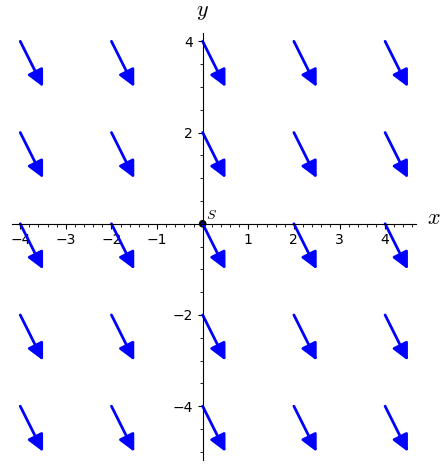

In [165]:
v.plot(chart=stereoN, chart_domain=stereoN, max_range=4, 
       number_values=5, scale=0.5, aspect_ratio=1) \
+ S.plot(stereoN, size=30, label_offset=0.2)

<p>The vector field appears homogeneous because its components w.r.t. the frame $\left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}\right)$ are constant:</p>

In [166]:
v.display(stereoN.frame())

v = ∂/∂x - 2 ∂/∂y

<p>On the contrary, once drawn in terms of the stereographic chart $(V, (x',y'))$, $v$ does no longer appears homogeneous:</p>

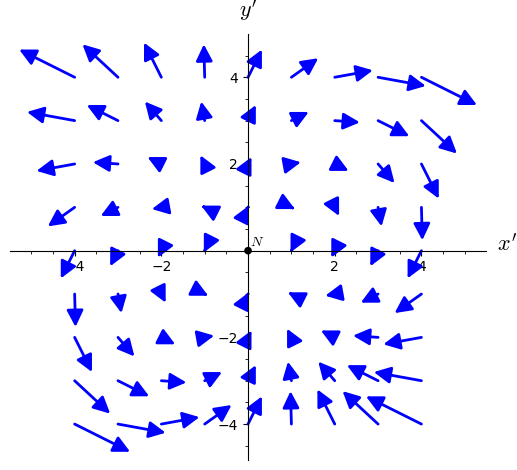

In [167]:
v.plot(chart=stereoS, chart_domain=stereoS, max_range=4, scale=0.02, 
       aspect_ratio=1) \
+ N.plot(chart=stereoS, size=30, label_offset=0.2)

<p>Finally, a 3D view of the vector field $v$ is obtained via the embedding $\Phi$:</p>

In [168]:
graph_v = v.plot(chart=cartesian, mapping=Phi, chart_domain=spher, 
                 number_values=11, scale=0.2)
graph_spher + graph_v

Graphics3d Object

<p>Similarly, let us draw the first vector field of the stereographic frame from the North pole, namely $\frac{\partial}{\partial x}$:</p>

In [169]:
stereoN.frame()

Coordinate frame (U, (∂/∂x,∂/∂y))

In [170]:
ex = stereoN.frame()[1]
ex

Vector field ∂/∂x on the Open subset U of the 2-dimensional differentiable manifold S^2

In [171]:
graph_ex = ex.plot(chart=cartesian, mapping=Phi, chart_domain=spher,
                   number_values=11, scale=0.4, width=1, 
                   label_axes=False)
graph_spher + graph_ex

Graphics3d Object

<p>For the second vector field of the stereographic frame from the North pole, namely $\frac{\partial}{\partial y}$, we get</p>

In [172]:
ey = stereoN.frame()[2]
ey

Vector field ∂/∂y on the Open subset U of the 2-dimensional differentiable manifold S^2

In [173]:
graph_ey = ey.plot(chart=cartesian, mapping=Phi, chart_domain=spher,
                   number_values=11, scale=0.4, width=1, color='red', 
                   label_axes=False)
graph_spher + graph_ey

Graphics3d Object

We may combine the two graphs, to get a 3D view of the vector frame associated with the stereographic coordinates from the North pole:

In [174]:
graph_frame = graph_spher + graph_ex + graph_ey \
              + N.plot(cartesian, mapping=Phi, label_offset=0.05, size=5) \
              + S.plot(cartesian, mapping=Phi, label_offset=0.05, size=5)
graph_frame + sphere(color='lightgrey', opacity=0.4)

Graphics3d Object

The same scene rendered with Tachyon:

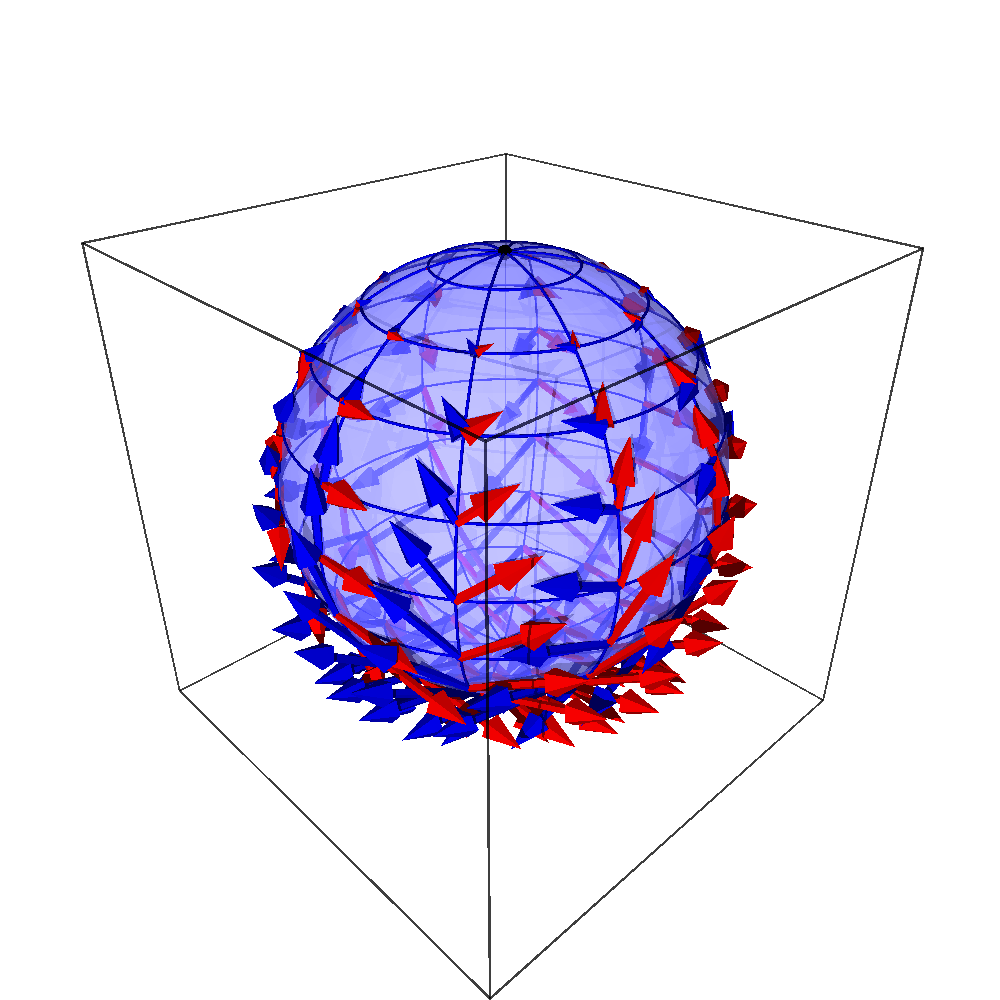

In [175]:
show(graph_frame + sphere(opacity=0.5), viewer='tachyon', figsize=10)

### Vector fields acting on scalar fields

$v$ and $f$ are both fields defined on the whole sphere (respectively a vector field and a scalar field). By the very definition of a vector field, $v$ acts on $f$:

In [176]:
vf = v(f)
print(vf)
vf.display()

Scalar field v(f) on the 2-dimensional differentiable manifold S^2


v(f): S^2 → ℝ
on U: (x, y) ↦ -2*(x - 2*y)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)
on V: (xp, yp) ↦ -2*(xp^3 - 2*xp^2*yp + xp*yp^2 - 2*yp^3)/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1)
on A: (th, ph) ↦ 1/2*((cos(ph) - 2*sin(ph))*cos(th) - cos(ph) + 2*sin(ph))*sin(th)

Values of $v(f)$ at the North pole, at the South pole and at point $p$:

In [177]:
vf(N)

0

In [178]:
vf(S)

0

In [179]:
vf(p)

1/6

## 1-forms

A 1-form on $\mathbb{S}^2$ is a field of linear forms on the tangent spaces. For instance it can be the differential of a scalar field:

In [180]:
f.display()

f: S^2 → ℝ
on U: (x, y) ↦ 1/(x^2 + y^2 + 1)
on V: (xp, yp) ↦ (xp^2 + yp^2)/(xp^2 + yp^2 + 1)
on A: (th, ph) ↦ -1/2*cos(th) + 1/2

In [181]:
df = diff(f)
print(df)

1-form df on the 2-dimensional differentiable manifold S^2


In [182]:
df.display()  # display w.r.t. the default frame

df = -2*x/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx - 2*y/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy

In [183]:
df.display(eV)

df = 2*xp/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dxp + 2*yp/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dyp

In [184]:
df.display(spher.frame())

df = sqrt(x^2 + y^2)/(x^2 + y^2 + 1) dth

In [185]:
df.display(spher.frame(), spher)  # asking for the components to be shown in the spherical chart

df = 1/2*sin(th) dth

In [186]:
print(df.parent())

Module Omega^1(S^2) of 1-forms on the 2-dimensional differentiable manifold S^2


In [187]:
df.parent()

Module Omega^1(S^2) of 1-forms on the 2-dimensional differentiable manifold S^2

<p><span id="cell_outer_146">The 1-form acting on a vector field:</span></p>

In [188]:
print(df(v))
df(v).display()

Scalar field df(v) on the 2-dimensional differentiable manifold S^2


df(v): S^2 → ℝ
on U: (x, y) ↦ -2*(x - 2*y)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)
on V: (xp, yp) ↦ -2*(xp^3 - 2*xp^2*yp + xp*yp^2 - 2*yp^3)/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1)
on A: (th, ph) ↦ 1/2*((cos(ph) - 2*sin(ph))*cos(th) - cos(ph) + 2*sin(ph))*sin(th)

<p>Let us check the identity $\mathrm{d}f(v) = v(f)$:</p>

In [189]:
df(v) == v(f)

True

<p>Similarly, we have $\mathcal{L}_v f = v(f)$:</p>

In [190]:
f.lie_derivative(v) == v(f)

True

## Curves in $\mathbb{S}^2$

In order to define curves in $\mathbb{S}^2$, we first introduce the field of real numbers $\mathbb{R}$ as a 1-dimensional smooth manifold with a canonical coordinate chart:

In [191]:
R.<t> = manifolds.RealLine()
print(R)

Real number line ℝ


In [192]:
print(R.category())

Category of smooth connected manifolds over Real Field with 53 bits of precision


In [193]:
dim(R)

1

In [194]:
R.atlas()

[Chart (ℝ, (t,))]

<p>Let us define a <strong>loxodrome of the sphere</strong> in terms of its parametric equation with respect to the chart <span style="font-family: courier new,courier;">spher</span> = $(A,(\theta,\phi))$</p>

In [195]:
c = S2.curve({spher: [2*atan(exp(-t/10)), t]}, (t, -oo, +oo), name='c')

<p>Curves in $\mathbb{S}^2$ are considered as morphisms from the manifold $\mathbb{R}$ to the manifold $\mathbb{S}^2$:</p>

In [196]:
c.parent()

Set of Morphisms from Real number line ℝ to 2-dimensional differentiable manifold S^2 in Category of smooth manifolds over Real Field with 53 bits of precision

In [197]:
c.display()

c: ℝ → S^2
   t ↦ (x, y) = (cos(t)*e^(1/10*t), e^(1/10*t)*sin(t))
   t ↦ (xp, yp) = (cos(t)*e^(-1/10*t), e^(-1/10*t)*sin(t))
   t ↦ (th, ph) = (2*arctan(e^(-1/10*t)), t)

<p>The curve $c$ can be plotted in terms of stereographic coordinates $(x,y)$:</p>

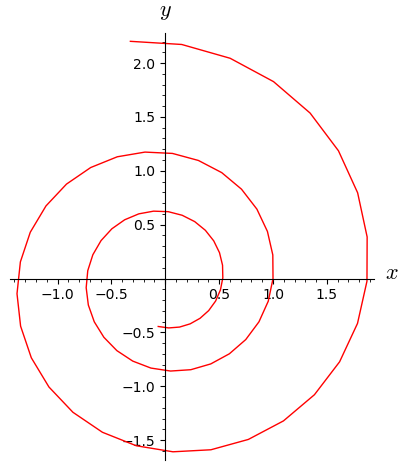

In [198]:
c.plot(chart=stereoN, aspect_ratio=1)

<p>We recover the well-known fact that the graph of a loxodrome in terms of stereographic coordinates is a <strong>logarithmic spiral</strong>.</p>
<p>Thanks to the embedding $\Phi$, we may also plot $c$ in terms of the Cartesian coordinates of $\mathbb{R}^3$:</p>

In [199]:
graph_c = c.plot(mapping=Phi, max_range=40, plot_points=200, 
                 thickness=2, label_axes=False)
graph_spher + graph_c

Graphics3d Object

<p>The <strong>tangent vector field</strong> (or <strong>velocity vector</strong>) to the curve $c$ is</p>

In [200]:
vc = c.tangent_vector_field()
vc

Vector field c' along the Real number line ℝ with values on the 2-dimensional differentiable manifold S^2

<p>$c'$ is a vector field <em>along</em> $\mathbb{R}$ taking its values in tangent spaces to $\mathbb{S}^2$:</p>

In [201]:
print(vc)

Vector field c' along the Real number line ℝ with values on the 2-dimensional differentiable manifold S^2


<p>The set of vector fields along $\mathbb{R}$ taking their values on $\mathbb{S}^2$ via the differential mapping $c: \mathbb{R} \rightarrow \mathbb{S}^2$ is denoted by $\mathfrak{X}(\mathbb{R},c)$; it is a module over the algebra $C^\infty(\mathbb{R})$:</p>

In [202]:
vc.parent()

Module X(ℝ,c) of vector fields along the Real number line ℝ mapped into the 2-dimensional differentiable manifold S^2

In [203]:
vc.parent().category()

Category of modules over Algebra of differentiable scalar fields on the Real number line ℝ

In [204]:
vc.parent().base_ring()

Algebra of differentiable scalar fields on the Real number line ℝ

<p>A coordinate view of $c'$:</p>

In [205]:
vc.display()

c' = (1/10*cos(t)*e^(1/10*t) - e^(1/10*t)*sin(t)) ∂/∂x + (cos(t)*e^(1/10*t) + 1/10*e^(1/10*t)*sin(t)) ∂/∂y

<p>Let us plot the vector field $c'$ in terms of the stereographic chart $(U,(x,y))$:</p>

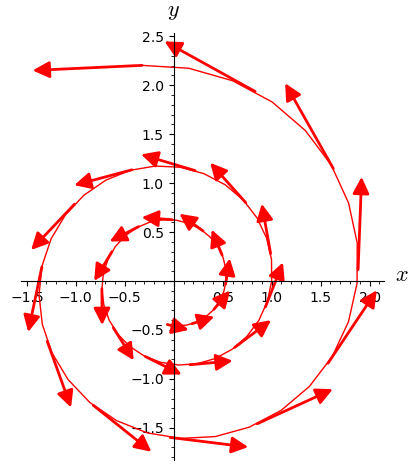

In [206]:
show(vc.plot(chart=stereoN, number_values=30, scale=0.5, color='red') +
     c.plot(chart=stereoN), aspect_ratio=1)

<p>A 3D view of $c'$ is obtained via the embedding $\Phi$:</p>

In [207]:
graph_vc = vc.plot(chart=cartesian, mapping=Phi, ranges={t: (-20, 20)}, 
                   number_values=30, scale=0.5, color='red', 
                   label_axes=False)
graph_spher + graph_c + graph_vc

Graphics3d Object

## Riemannian metric on $\mathbb{S}^2$

The standard metric on $\mathbb{S}^2$ is that induced by the Euclidean metric of $\mathbb{R}^3$. The latter
is obtained by:

In [208]:
h = R3.metric()
h.display()

h = dX⊗dX + dY⊗dY + dZ⊗dZ

The metric $g$ on $\mathbb{S}^2$ is the pullback of $h$ by the embedding $\Phi$:

In [209]:
g = S2.metric('g')
g.set( Phi.pullback(h) )
print(g)

Riemannian metric g on the 2-dimensional differentiable manifold S^2


Note that we could have defined $g$ intrinsically, i.e. by providing its components in the two frames `stereoN` and `stereoS`. Instead, we have chosen to get it as the pullback of $h$, since the pullback computation is implemented in SageMath.

The metric is a symmetric tensor field of type (0,2):

In [210]:
print(g.parent())

Module T^(0,2)(S^2) of type-(0,2) tensors fields on the 2-dimensional differentiable manifold S^2


In [211]:
g.tensor_type()

(0, 2)

In [212]:
g.symmetries()

symmetry: (0, 1); no antisymmetry


The expression of the metric in terms of the default frame on $\mathbb{S}^2$ (stereoN):

In [213]:
g.display()

g = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx⊗dx + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy⊗dy

We may factorize the metric components:

In [214]:
g.apply_map(factor, frame=eU, keep_other_components=True)
g.display()

g = 4/(x^2 + y^2 + 1)^2 dx⊗dx + 4/(x^2 + y^2 + 1)^2 dy⊗dy

A matrix view of the components of $g$ in the manifold's default frame:

In [215]:
g[:]

[4/(x^2 + y^2 + 1)^2                   0]
[                  0 4/(x^2 + y^2 + 1)^2]

In [216]:
g[1,1]

4/(x^2 + y^2 + 1)^2

Display in terms of the vector frame `eV` =  $(V, (\partial_{x'}, \partial_{y'}))$:

In [217]:
g.apply_map(factor, frame=eV, keep_other_components=True)
g.display(eV)

g = 4/(xp^2 + yp^2 + 1)^2 dxp⊗dxp + 4/(xp^2 + yp^2 + 1)^2 dyp⊗dyp

Expression of the metric tensor in terms of spherical coordinates:

In [218]:
g.display(spher.frame(), chart=spher)

g = dth⊗dth + sin(th)^2 dph⊗dph

The metric acts on vector field pairs, resulting in a scalar field:

In [219]:
print(g(v,v))

Scalar field g(v,v) on the 2-dimensional differentiable manifold S^2


In [220]:
g(v,v).parent()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

In [221]:
g(v,v).display()

g(v,v): S^2 → ℝ
on U: (x, y) ↦ 20/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)
on V: (xp, yp) ↦ 20*(xp^4 + 2*xp^2*yp^2 + yp^4)/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1)
on A: (th, ph) ↦ 5*cos(th)^2 - 10*cos(th) + 5

The **Levi-Civita connection** associated with the metric $g$:

In [222]:
nabla = g.connection()
print(nabla)
nabla

Levi-Civita connection nabla_g associated with the Riemannian metric g on the 2-dimensional differentiable manifold S^2


Levi-Civita connection nabla_g associated with the Riemannian metric g on the 2-dimensional differentiable manifold S^2

As a test, we verify that $\nabla_g$ acting on $g$ results in zero:

In [223]:
nabla(g).display()

nabla_g(g) = 0

The nonzero Christoffel symbols of $g$ (skipping those that can be deduced by symmetry on the last two indices) w.r.t. two charts:

In [224]:
g.christoffel_symbols_display(chart=stereoN)

Gam^x_xx = -2*x/(x^2 + y^2 + 1) 
Gam^x_xy = -2*y/(x^2 + y^2 + 1) 
Gam^x_yy = 2*x/(x^2 + y^2 + 1) 
Gam^y_xx = 2*y/(x^2 + y^2 + 1) 
Gam^y_xy = -2*x/(x^2 + y^2 + 1) 
Gam^y_yy = -2*y/(x^2 + y^2 + 1)

In [225]:
g.christoffel_symbols_display(chart=spher)

Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_th,ph = cos(th)/sin(th)

$\nabla_g$ acting on the vector field $v$:

In [226]:
print(nabla(v))

Tensor field nabla_g(v) of type (1,1) on the 2-dimensional differentiable manifold S^2


In [227]:
nabla(v).display(stereoN.frame())

nabla_g(v) = -2*(x - 2*y)/(x^2 + y^2 + 1) ∂/∂x⊗dx - 2*(2*x + y)/(x^2 + y^2 + 1) ∂/∂x⊗dy + 2*(2*x + y)/(x^2 + y^2 + 1) ∂/∂y⊗dx - 2*(x - 2*y)/(x^2 + y^2 + 1) ∂/∂y⊗dy

In [228]:
nabla(v)[:]

[-2*(x - 2*y)/(x^2 + y^2 + 1) -2*(2*x + y)/(x^2 + y^2 + 1)]
[ 2*(2*x + y)/(x^2 + y^2 + 1) -2*(x - 2*y)/(x^2 + y^2 + 1)]

In [229]:
nabla(v)[1,2]

-2*(2*x + y)/(x^2 + y^2 + 1)

## Curvature

The Riemann tensor associated with the metric $g$:

In [230]:
Riem = g.riemann()
print(Riem)
Riem.display()

Tensor field Riem(g) of type (1,3) on the 2-dimensional differentiable manifold S^2


Riem(g) = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) ∂/∂x⊗dy⊗dx⊗dy - 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) ∂/∂x⊗dy⊗dy⊗dx - 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) ∂/∂y⊗dx⊗dx⊗dy + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) ∂/∂y⊗dx⊗dy⊗dx

The components of the Riemann tensor in the default frame on $\mathbb{S}^2$:

In [231]:
Riem.display_comp()

Riem(g)^x_yxy = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^x_yyx = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^y_xxy = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^y_xyx = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)

<p>The components in the frame associated with spherical coordinates:</p>

In [232]:
Riem.display_comp(spher.frame(), chart=spher)

Riem(g)^th_ph,th,ph = sin(th)^2 
Riem(g)^th_ph,ph,th = -sin(th)^2 
Riem(g)^ph_th,th,ph = -1 
Riem(g)^ph_th,ph,th = 1

In [233]:
print(Riem.parent())

Module T^(1,3)(S^2) of type-(1,3) tensors fields on the 2-dimensional differentiable manifold S^2


In [234]:
Riem.symmetries()

no symmetry; antisymmetry: (2, 3)


The Riemann tensor associated with the Euclidean metric $h$ on $\mathbb{R}^3$ is identically zero:

In [235]:
h.riemann().display()

Riem(h) = 0

The Ricci tensor and the Ricci scalar:

In [236]:
Ric = g.ricci()
Ric.display()

Ric(g) = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx⊗dx + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy⊗dy

In [237]:
print(g.inverse())

Tensor field inv_g of type (2,0) on the 2-dimensional differentiable manifold S^2


In [238]:
g.inverse().display()

inv_g = (1/4*x^4 + 1/4*y^4 + 1/2*(x^2 + 1)*y^2 + 1/2*x^2 + 1/4) ∂/∂x⊗∂/∂x + (1/4*x^4 + 1/4*y^4 + 1/2*(x^2 + 1)*y^2 + 1/2*x^2 + 1/4) ∂/∂y⊗∂/∂y

In [239]:
R = g.ricci_scalar()
R.display()

r(g): S^2 → ℝ
on U: (x, y) ↦ 2
on V: (xp, yp) ↦ 2
on A: (th, ph) ↦ 2

Hence we recover the fact that $(\mathbb{S}^2,g)$ is a Riemannian manifold of constant positive curvature.

In dimension 2, the Riemann curvature tensor is entirely determined by the Ricci scalar $R$ according to
$$ R^i_{\ \, jlk} = \frac{R}{2} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right)$$
Let us check this formula here, under the form $R^i_{\ \, jlk} = -R g_{j[k} \delta^i_{\ \, l]}$:

In [240]:
delta = S2.tangent_identity_field()
Riem == - R*(g*delta).antisymmetrize(2,3)

True

Similarly the relation $\mathrm{Ric} = (R/2)\; g$ must hold:

In [241]:
Ric == (R/2)*g

True

### Manifold orientation and volume 2-form

In order to introduce the volume 2-form associated with the metric $g$, we need to define an orientation on $\mathbb{S}^2$ first. We choose the orientation so that the vector frame $(\partial/\partial x', \partial/\partial y')$ of the stereographic coordinates from the South pole is right-handed. This is somewhat natural, because the triplet $(\partial/\partial x', \partial/\partial y', n)$, where $n$ is the unit outward normal to $\mathbb{S}^2$, is right-handed with respect to the standard orientation of $\mathbb{R}^3$. On the contrary the triplet
$(\partial/\partial x, \partial/\partial y, n)$ formed from stereographic coordinates from the North pole is left-handed (see the above plot). Actually, we can check that $(\partial/\partial x, \partial/\partial y)$
and $(\partial/\partial x', \partial/\partial y')$ lead to two opposite orientations, because the transition map
$(x, y) \mapsto (x', y')$ has a negative Jacobian determinant:

In [242]:
stereoN_to_S.jacobian_det()

-1/(x^4 + 2*x^2*y^2 + y^4)

We define the orientation via the method `set_orientation()` with a list of right-handed vector frames, whose domains form an open cover of $\mathbb{S}^2$. We therefore provide `eV` = $(\partial/\partial x', \partial/\partial y')$ (domain: $V$) and the "reversed" frame $(\partial/\partial y, \partial/\partial x)$ on $U$:

In [243]:
reU = U.vector_frame('f', (eU[2], eU[1]))
reU[1].display(eU), reU[2].display(eU)

(f_1 = ∂/∂y, f_2 = ∂/∂x)

In [244]:
S2.set_orientation([eV, reU])

The **volume 2-form** or **Levi-Civita tensor** associated with $g$ is then

In [245]:
eps = g.volume_form()
print(eps)
eps.display()

2-form eps_g on the 2-dimensional differentiable manifold S^2


eps_g = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx∧dy

Notice the minus sign in the the above expression, which reflects the fact that the default frame $(\partial/\partial x, \partial/\partial y)$ is left-handed. On the contrary, we have

In [246]:
eps.display(eV)

eps_g = 4/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dxp∧dyp

A nicer display is obtained by factorizing the components:

In [247]:
eps.apply_map(factor, frame=eV, keep_other_components=True)
eps.display(stereoS.frame())

eps_g = 4/(xp^2 + yp^2 + 1)^2 dxp∧dyp

The frame associated with spherical coordinates is right-handed and we recover the standard expression of the volume 2-form:

In [248]:
eps.display(spher.frame(), chart=spher)

eps_g = sin(th) dth∧dph

The exterior derivative of the 2-form $\epsilon_g$:

In [249]:
print(diff(eps))

3-form deps_g on the 2-dimensional differentiable manifold S^2


Of course, since $\mathbb{S}^2$ has dimension 2, all 3-forms vanish identically:

In [250]:
diff(eps).display()

deps_g = 0

### Non-holonomic frames
Up to know, all the vector frames introduced on $\mathbb{S}^2$ have been coordinate frames. Let us introduce a non-coordinate frame on the open subset $A$. To ease the manipulations, we change first the default chart and default frame on $A$ to the spherical coordinate ones:

In [251]:
A.default_chart()

Chart (A, (x, y))

In [252]:
A.default_frame()

Coordinate frame (A, (∂/∂x,∂/∂y))

In [253]:
A.set_default_chart(spher)
A.set_default_frame(spher.frame())
A.default_chart()

Chart (A, (th, ph))

In [254]:
A.default_frame()

Coordinate frame (A, (∂/∂th,∂/∂ph))

We introduce the new vector frame $e =  \left(\frac{\partial}{\partial\theta}, \frac{1}{\sin\theta}\frac{\partial}{\partial\phi}\right)$:

In [255]:
spher.frame()[:]

(Vector field ∂/∂th on the Open subset A of the 2-dimensional differentiable manifold S^2,
 Vector field ∂/∂ph on the Open subset A of the 2-dimensional differentiable manifold S^2)

In [256]:
d_dth, d_dph = spher.frame()[:]
e = A.vector_frame('e', (d_dth, 1/sin(th)*d_dph))
print(e)
e

Vector frame (A, (e_1,e_2))


Vector frame (A, (e_1,e_2))

In [257]:
(e[1].display(), e[2].display())

(e_1 = ∂/∂th, e_2 = 1/sin(th) ∂/∂ph)

<p>The new frame is an orthonormal frame for the metric $g$:</p>

In [258]:
g(e[1],e[1]).expr()

1

In [259]:
g(e[1],e[2]).expr()

0

In [260]:
g(e[2],e[2]).expr()

1

In [261]:
g[e,:]

[1 0]
[0 1]

In [262]:
g.display(e)

g = e^1⊗e^1 + e^2⊗e^2

In [263]:
eps.display(e)

eps_g = e^1∧e^2

It is non-holonomic, since its structure coefficients are not identically zero:

In [264]:
e.structure_coeff()[:]

[[[0, 0], [0, 0]], [[0, -cos(th)/sin(th)], [cos(th)/sin(th), 0]]]

In [265]:
e[2].lie_derivative(e[1]).display(e)

-cos(th)/sin(th) e_2

<p>while we have of course</p>

In [266]:
spher.frame().structure_coeff()[:]

[[[0, 0], [0, 0]], [[0, 0], [0, 0]]]

## Using SymPy as the symbolic backend

By default, the symbolic backend used in calculus on manifolds is SageMath's one (Pynac + Maxima), implemented via the symbolic ring `SR`. We can choose to use [SymPy](https://www.sympy.org/) instead:

In [267]:
S2.set_calculus_method('sympy')

In [268]:
F = 2*f
F.display()

S^2 → ℝ
on U: (x, y) ↦ 2/(x**2 + y**2 + 1)
on V: (xp, yp) ↦ 2*(xp**2 + yp**2)/(xp**2 + yp**2 + 1)
on A: (th, ph) ↦ 1 - cos(th)

In [269]:
F.expr()

2/(x**2 + y**2 + 1)

In [270]:
type(F.expr())

<class 'sympy.core.mul.Mul'>

Back to Sage's default:

In [271]:
S2.set_calculus_method('SR')

In [272]:
F.expr()

2/(x^2 + y^2 + 1)

In [273]:
type(F.expr())

<class 'sage.symbolic.expression.Expression'>

## Going further

See the notebooks [Smooth manifolds, charts and scalar fields](https://nbviewer.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb) and [Smooth manifolds, vector fields and tensor fields](https://nbviewer.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_vector.ipynb) from the lectures [Symbolic tensor calculus on manifolds](https://sagemanifolds.obspm.fr/jncf2018/). Many example notebooks are 
provided at the [SageManifolds page](https://sagemanifolds.obspm.fr/examples.html).

See also the series of notebooks by Andrzej Chrzeszczyk: [Introduction to manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html), as well as the tutorial videos by Christian Bär: [Manifolds in SageMath](https://www.youtube.com/playlist?list=PLnrOCYZpQUuJlnQbQ48zgGk-Ks1t145Yw).